# Using K-means algorithm to recognise color in image

This Jupyter notebook "k_mean primary color.ipynb" is designed to perform color analysis on a set of images.
It uses the k-means clustering algorithm to identify the primary colors in each image.


## Import libraries

Necessary libraries. They are :

- `sklearn` for KMeans algorithm,
- `matplotlib.pyplot` for plotting graphs,
- `numpy` to work with arrays,
- `cv2` to work with image data,
- `collections` to use Counter to count values,
- `rgb2lab` to convert RGB values and
- `deltaE_cie76` to calculate similarity between colors.


In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

## Load and Preprocess the image


The type of this input is <class 'numpy.ndarray'>
Shape: (400, 600, 3)


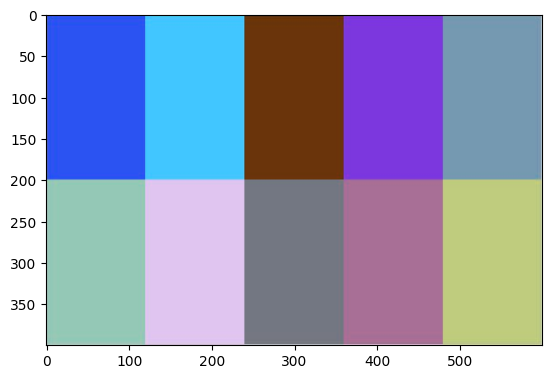

In [2]:
def load_and_preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Αποτυχία φόρτωσης εικόνας.")
    
    # Μετατροπή από BGR σε RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Αλλαγή μεγέθους εικόνας για ταχύτερη επεξεργασία
    image = cv2.resize(image, (300, 200), interpolation=cv2.INTER_AREA)
    
    # Αναδιαμόρφωση σε 2D array για επεξεργασία με KMeans
    pixels = image.reshape(-1, 3)
    
    return image, pixels

# Φόρτωση και προεπεξεργασία της εικόνας
image_path = 'samples\10colors.jpg'
original_image, pixels = load_and_preprocess_image(image_path)

plt.imshow(original_image)
plt.title("Αρχική Εικόνα")
plt.show()

print(f"Σχήμα εικόνας: {original_image.shape}")
print(f"Αριθμός pixels: {pixels.shape[0]}")